In [ ]:
'import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96"

# resp = pd.read_html(url, match="Коефіцієнт народжуваності у регіонах України")
# birth_stat = resp[0] if len(resp) > 0 else None

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

resp = pd.read_html(url, match="Коефіцієнт народжуваності в регіонах України")
birth_stat = resp[0] if len(resp) > 0 else None



1. Вивести перші рядки таблиці за допомогою методу head

In [ ]:
birth_stat.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


2. Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [ ]:
birth_stat.shape

(28, 9)

3. Замініть у таблиці значення "—" на значення NaN

In [ ]:
birth_stat = birth_stat.replace('—', np.nan)
birth_stat

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


4. Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [ ]:
birth_stat.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

5. Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [ ]:
birth_stat["2014"] = pd.to_numeric(birth_stat["2014"], downcast="integer", errors="coerce")
birth_stat["2019"] = pd.to_numeric(birth_stat["2019"], downcast="integer", errors="coerce")

birth_stat.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

6. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [ ]:
birth_stat.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

7. Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [ ]:
birth_stat = birth_stat[:-1]

8. Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [ ]:
birth_stat.loc[birth_stat["2019"] >= birth_stat.mean()["2019"]].sort_values(by=["2019"], ascending=False)

<ipython-input-10-6297f85b4f28>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  birth_stat.loc[birth_stat["2019"] >= birth_stat.mean()["2019"]].sort_values(by=["2019"], ascending=False)


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
25,Київ,NaN,174.0,159.0,120,73,120,121.0,110.0
16,Рівненська,269.0,267.0,193.0,158,118,159,148.0,107.0
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
23,Чернівецька,247.0,218.0,170.0,148,101,128,129.0,92.0
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0
14,Одеська,241.0,192.0,148.0,126,80,127,123.0,88.0
12,Львівська,234.0,240.0,171.0,140,91,119,119.0,87.0
20,Херсонська,208.0,214.0,166.0,143,85,117,115.0,81.0


9. У якому регіоні була найвища народжуваність у 2014 році?

In [ ]:
birth_stat.loc[birth_stat["2014"] == birth_stat.max()["2014"]]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
16,Рівненська,269.0,267.0,193.0,158,118,159,148.0,107.0


10. Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

<Axes: ylabel='Регіон'>

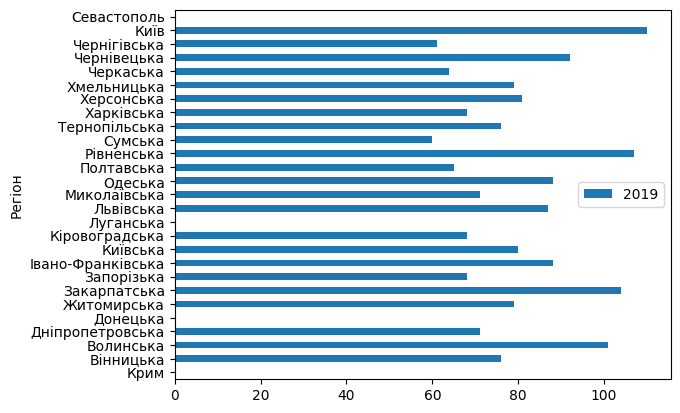

In [ ]:
birth_stat.plot.barh(x='Регіон', y='2019', rot=0)

Візуалізація

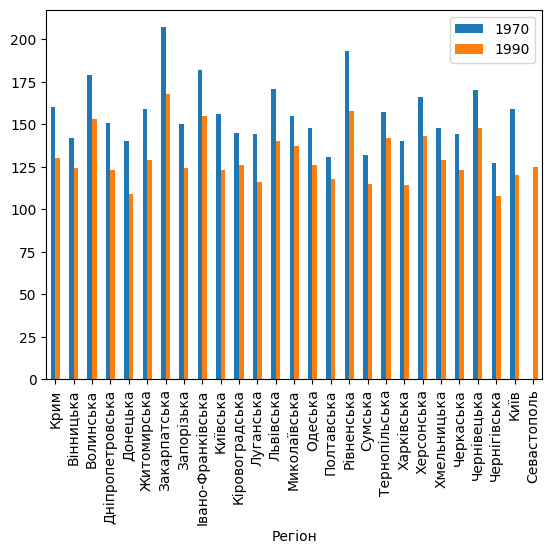

In [ ]:
df = pd.DataFrame({'Регіон': birth_stat['Регіон'],
                  '1970': birth_stat['1970'],
                    '1990': birth_stat['1990']})

df = df.set_index('Регіон')

ax = df.plot.bar(y=['1970','1990'])


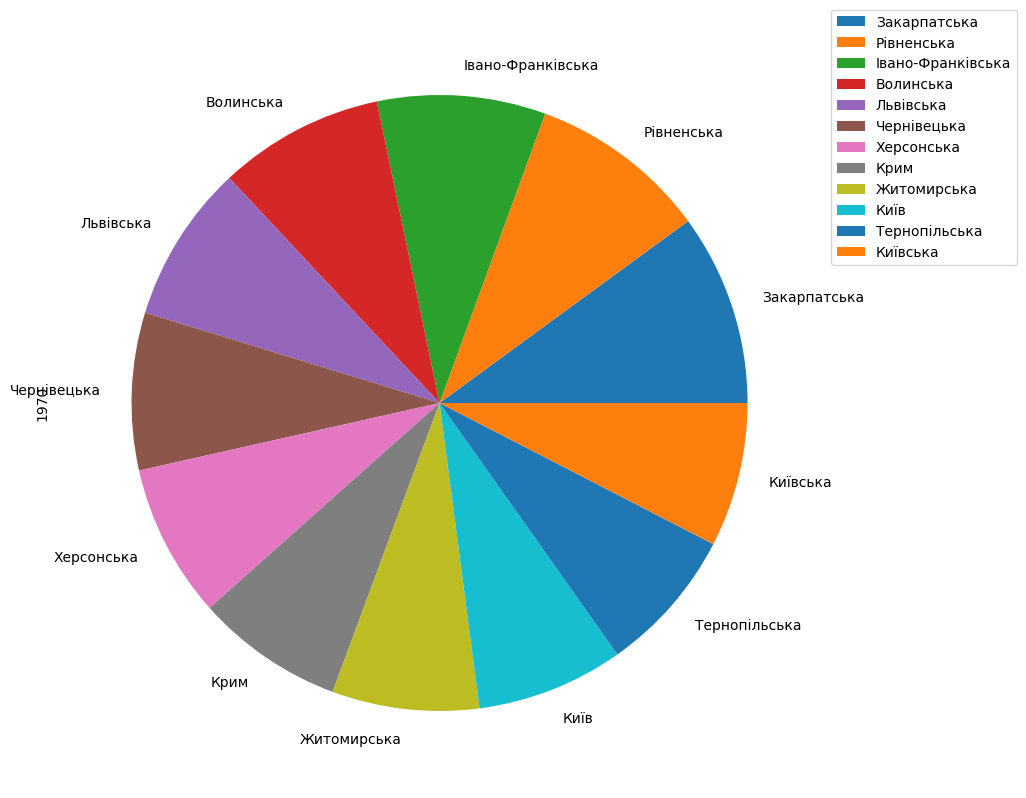

In [ ]:
df = pd.DataFrame({'Регіон': birth_stat['Регіон'],
                  '1970': birth_stat['1970']})
df = df.set_index('Регіон')
df = df.loc[df["1970"] >= df.mean()["1970"]].sort_values(by=["1970"], ascending=False)
plot = df.plot.pie(y='1970', figsize=(10, 10), legend=True)
plot.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

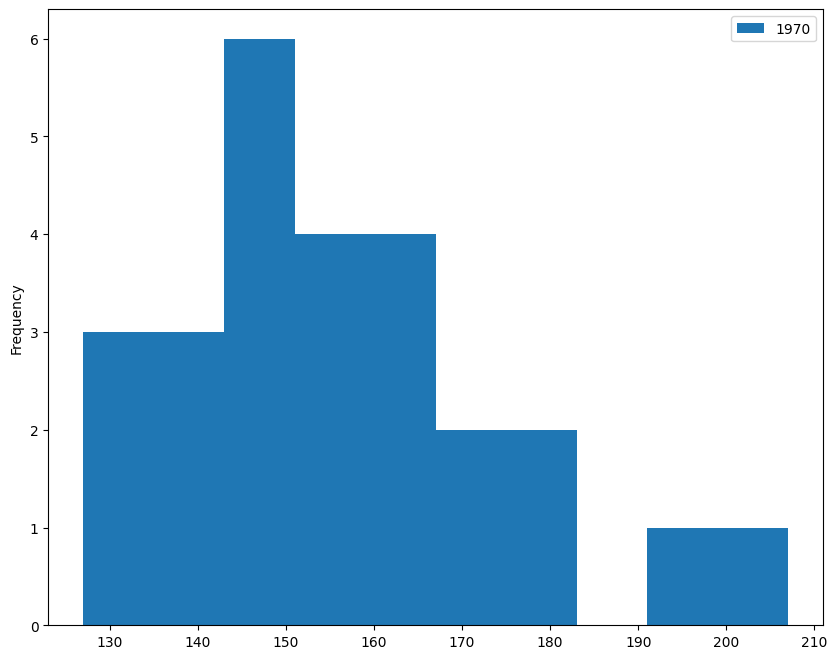

In [ ]:
df = pd.DataFrame({'Регіон': birth_stat['Регіон'],
                  '1970': birth_stat['1970']})
df = df.set_index('Регіон')
ax = df.plot.hist(column=["1970"], figsize=(10, 8))